In [1]:
import os
from pdf2image import convert_from_path
import cv2
import PIL
import pytesseract
from pytesseract import Output
import pandas as pd
import time
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import math

In [2]:
def get_string(img_path):
    # Read image using opencv
    img = cv2.imread(img_path)

    # Extract the file name without the file extension
    file_name = os.path.basename(img_path).split('.')[0]
    file_name = file_name.split()[0]

    # Create a directory for outputs
    output_path = os.path.join(output_dir, file_name)
    if not os.path.exists(output_path):
        os.makedirs(output_path)

box=""
pdf_dir = r"/Users/KP/Documents/"
os.chdir(pdf_dir)

for pdf_file in os.listdir(pdf_dir):
    if pdf_file.endswith(".pdf"):
        pages = convert_from_path(pdf_file, 300)
        pdf_file = pdf_file[:-4]
        for page in pages:
            page.save("%s-page%d.jpg" % (pdf_file,pages.index(page)), "JPEG", dpi=(300,300))
            img = cv2.imread(pdf_file+'-page'+str(pages.index(page))+'.jpg')
            d = pytesseract.image_to_data(img, output_type=Output.DICT)
            n_boxes = len(d['level'])
            paragraph_boxes=[]
            for i in range(n_boxes):
                (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
                if d['level'][i]==2:#d['level'][i]!=1 and d['level'][i]!=2 and d['level']!=3:
                    a=str(x)+"\t"+str(y)+"\t"+str(w)+"\t"+str(h)
                    paragraph_boxes.append(a)
                    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
                    #print(i,d['level'][i],"\t",d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            cv2.imwrite(pdf_file+'-page'+str(pages.index(page))+'_bounded.jpg', img)
            ctr=0
            list_words=[]
            temp_list=[]
            flag=0
            start=0
            end=0
            output_file=open(pdf_file+'-page'+str(pages.index(page))+".csv",'w')
            box="X1,Y1,X2,Y2,Label\n"
            for i in range(n_boxes):
                (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
                if d['level'][i]==5:#d['level'][i]!=1 and d['level'][i]!=2 and d['level']!=3:
                    para_x1=int(paragraph_boxes[ctr].split("\t")[0])
                    para_y1=int(paragraph_boxes[ctr].split("\t")[1])
                    para_x2=int(int(paragraph_boxes[ctr].split("\t")[0])+int(paragraph_boxes[ctr].split("\t")[2]))
                    para_y2=int(int(paragraph_boxes[ctr].split("\t")[1])+int(paragraph_boxes[ctr].split("\t")[3]))
                    word_x2=int(int(a.split("\t")[0])+int(a.split("\t")[2]))
                    word_y2=int(int(a.split("\t")[1])+int(a.split("\t")[3]))
                    if (d['left'][i]>=para_x1) & (d['top'][i]>=para_y1):
                        #print(ctr,paragraph_boxes[ctr],para_x2,para_y2)
                        #print(i,d['left'][i], d['top'][i],word_x2,word_y2)
                        if(word_x2>para_x2)&(word_y2>para_y2):
                            end=i
                            for j in range(start,end):
                                if d['level'][j]==5:
                                    x1y1=(d['left'][j],d['top'][j])
                                    x2y2=(word_x2,word_y2)
                                    word=(x1y1,x2y2)
                                    #print(word)
                                    temp_list.append(word)
                                    #print(temp_list)
                                    flag=1
                            if flag==1:
                                ctr+=1
                                start=end
                                list_words.append(temp_list)
                                box+=str(para_x1)+","+str(para_y1)+","+str(para_x2)+","+str(para_y2)+","+"Paragraph\n"
                                print(box)
                                temp_list=[]
                                flag=0
            output_file.write(box)
            output_file.close()

<h1> Creating CSV for words within table

In [3]:
box=""
pdf_dir = r"/Users/KP/Documents/"
os.chdir(pdf_dir)
for pdf_file in os.listdir(pdf_dir):
    if pdf_file.endswith(".pdf"):
        pages = convert_from_path(pdf_file, 300)
        pdf_file = pdf_file[:-4]
        for page in pages:
            page.save("%s-page%d.jpg" % (pdf_file,pages.index(page)), "JPEG", dpi=(300,300))
            img = cv2.imread(pdf_file+'-page'+str(pages.index(page))+'.jpg')
            d = pytesseract.image_to_data(img, output_type=Output.DICT)
            n_boxes = len(d['level'])
            #cv2.imwrite(pdf_file+'-page'+str(pages.index(page))+'_bounded.jpg', img)
            ctr=0
            list_words=[]
            temp_list=[]
            flag=0
            start=0
            end=0
            output_file=open(pdf_file+'-page'+str(pages.index(page))+".csv",'w')
            box="X1,Y1,X2,Y2,Label,Word\n"
            if pages.index(page)==2:
                for i in range(n_boxes):
                    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
                    if d['level'][i]==5:#d['level'][i]!=1 and d['level'][i]!=2 and d['level']!=3:
                        word_x1=d['left'][i]
                        word_y1=d['top'][i]
                        word_x2=d['left'][i]+d['width'][i]
                        word_y2=d['top'][i]+d['height'][i]
                        if ((word_x1>=240 and word_y1>=693) and (word_x2<=2149 and word_y2<=1345)):
                            print(d['text'][i])
                            box+=str(word_x1)+","+str(word_y1)+","+str(word_x2)+","+str(word_y2)+","+"Table Cell,"+d['text'][i]+"\n"
                output_file.write(box)
                output_file.close()

Filename
[Description
ap_bookmark.IFD
The
template
design.
ap_bookmark.mdf
The
template
targeted
for
PDF
output.
ap_bookmark.bmk
A
sample
bookmark
file.
ap_bookmark.pdf
Sample
PDF
output.
ap_bookmark_doc.pdf
A
document
describing
the
sample.
ap_bookmark.dat
A
sample
data
file
in
DAT
format.


<h1> Reading the created CSV and generate word bounding boxes within table

In [4]:
df=pd.read_csv("c4611_sample_explain-page2.csv",header=0)
li=[]
Xlist=[]
Ylist=[]
coord=[]
l=[]

In [5]:
img = cv2.imread('c4611_sample_explain-page2.jpg')
for i in range(len(df['X1'])):
    (x, y, w, h) = (df['X1'][i], df['Y1'][i], df['X2'][i]-df['X1'][i], df['Y2'][i]-df['Y1'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    temp=(df['X1'][i],df['X2'][i])#+df['Y2'][i])/2)
    Xlist.append((df['X1'][i]+df['X2'][i])/2)
    Ylist.append((df['Y1'][i]+df['Y2'][i])/2)
    coord.append([Xlist[i],Ylist[i]])
    if (i<len(df['Y1'])-1) and ((df['Y1'][i+1]-df['Y1'][i])/df['Y1'][i])<0.05:
        print(df['Y1'][i],df['Y1'][i+1])
        l.append(df['X1'][i])
        print(df['Word'][i],df['Word'][i+1])
    #temp=(df['X1'][i],df['Y1'][i])
    li.append(temp)
    cv2.imwrite('Custom_bounded.jpg', img)

693 693
Filename [Description
823 823
ap_bookmark.IFD The
823 823
The template
823 823
template design.
918 919
ap_bookmark.mdf The
919 919
The template
919 919
template targeted
919 918
targeted for
918 919
for PDF
919 920
PDF output.
1111 1111
ap_bookmark.bmk A
1111 1111
A sample
1111 1111
sample bookmark
1111 1110
bookmark file.
1206 1206
ap_bookmark.pdf Sample
1206 1207
Sample PDF
1207 1207
PDF output.
1301 1302
ap_bookmark_doc.pdf A
1302 1302
A document
1302 1302
document describing
1302 1302
describing the
1302 1302
the sample.
1302 1015
sample. ap_bookmark.dat
1015 1015
ap_bookmark.dat A
1015 1015
A sample
1015 1015
sample data
1015 1014
data file
1014 1015
file in
1015 1015
in DAT
1015 1014
DAT format.


<h1> Sort the words to identify text in same row

In [6]:
import math
ctr=0
l=[]
i=0
Final=[]
while(i<len(df)):
    ctr=i
    while(ctr<len(df['X1'])):
        if (ctr<len(df['Y1'])-1) and ((df['Y1'][ctr+1]-df['Y1'][ctr])/df['Y1'][ctr])<0.05:
            #print(df['Y1'][ctr],df['Y1'][ctr+1],math.sqrt(abs(coord[ctr+1][1]**2)-(coord[ctr][1]**2)),df['Word'][ctr])
            print(df['Word'][ctr],ctr,df['Word'][ctr+1])
            l.append([float(df['X1'][ctr]),float(df['X2'][ctr]),float(math.sqrt(abs((coord[ctr+1][1]**2)-(coord[ctr][1]**2)))),df['Word'][ctr],ctr])
            ctr+=1
        else:
            if (ctr<len(df['Y1'])-1) and ((df['Y1'][ctr]-df['Y1'][ctr-1])/df['Y1'][ctr-1])<0.05:
                print(df['Word'][ctr],ctr,df['Word'][ctr+1])
                l.append([float(df['X1'][ctr]),float(df['X2'][ctr]),float(math.sqrt(abs((coord[ctr+1][1]**2)-(coord[ctr][1]**2)))),df['Word'][ctr],ctr])
                ctr+=1
                i=ctr
            else:
                ctr+=1
                i=ctr
            if (len(l)>0):
                Final.append(l)
            l=[]
            break

Filename 0 [Description
[Description 1 ap_bookmark.IFD
ap_bookmark.IFD 2 The
The 3 template
template 4 design.
design. 5 ap_bookmark.mdf
ap_bookmark.mdf 6 The
The 7 template
template 8 targeted
targeted 9 for
for 10 PDF
PDF 11 output.
output. 12 ap_bookmark.bmk
ap_bookmark.bmk 13 A
A 14 sample
sample 15 bookmark
bookmark 16 file.
file. 17 ap_bookmark.pdf
ap_bookmark.pdf 18 Sample
Sample 19 PDF
PDF 20 output.
output. 21 ap_bookmark_doc.pdf
ap_bookmark_doc.pdf 22 A
A 23 document
document 24 describing
describing 25 the
the 26 sample.
sample. 27 ap_bookmark.dat
ap_bookmark.dat 28 A
A 29 sample
sample 30 data
data 31 file
file 32 in
in 33 DAT
DAT 34 format.


In [7]:
X=[]
X1=[]
for item in Final:
    for i in item:
        X.append(i[:3])
        X1.append(i)
X2=np.array(X)

<h1> Use K-means clustering to identify columns within the table

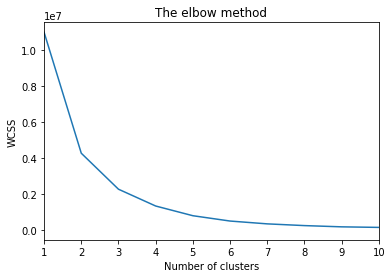

In [8]:
wcss = []

for i in range(1, len(X2)):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, len(X2)), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.xlim(1,10)
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

<h2>Identifying Optimum Clusters using Silhouette Score

In [9]:
maximum=-9999999
optimum_cluster=0
for n_clusters in range(2,len(X2)):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2, cluster_labels)
    if silhouette_avg>maximum:
        maximum=silhouette_avg
        optimum_cluster=n_clusters

In [10]:
print("Optimum Clusters identified at:",optimum_cluster)

Optimum Clusters identified at: 2


In [11]:
kmeans = KMeans(n_clusters = optimum_cluster, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X2)

In [12]:
for i in range(len(X1)):
    print(X1[i],"Cluster",y_kmeans[i])

[240.0, 912.0, 0.0, 'Filename', 0] Cluster 0
[915.0, 2149.0, 406.78710648200246, '[Description', 1] Cluster 1
[264.0, 624.0, 82.07313811473277, 'ap_bookmark.IFD', 2] Cluster 0
[938.0, 1015.0, 82.07313811473277, 'The', 3] Cluster 1
[1030.0, 1203.0, 29.055980451535273, 'template', 4] Cluster 1
[1220.0, 1361.0, 411.6794869798591, 'design.', 5] Cluster 1
[264.0, 630.0, 81.0200592446093, 'ap_bookmark.mdf', 6] Cluster 0
[938.0, 1015.0, 86.62563131083085, 'The', 7] Cluster 1
[1030.0, 1203.0, 30.663496212923928, 'template', 8] Cluster 1
[1218.0, 1382.0, 96.85040010242601, 'targeted', 9] Cluster 1
[1398.0, 1452.0, 0.0, 'for', 10] Cluster 1
[1469.0, 1554.0, 96.85040010242601, 'PDF', 11] Cluster 1
[1571.0, 1705.0, 629.9871030425941, 'output.', 12] Cluster 1
[264.0, 638.0, 100.83526168954985, 'ap_bookmark.bmk', 13] Cluster 0
[937.0, 968.0, 100.83526168954985, 'A', 14] Cluster 1
[982.0, 1127.0, 95.0789145920377, 'sample', 15] Cluster 1
[1144.0, 1320.0, 33.581989220413966, 'bookmark', 16] Cluster 1


<h1> TCD

In [13]:
import math
ctr=0
l=[]
col={}
i=0
for i in range(len(y_kmeans)):
    col[y_kmeans[i]]=[]
for key in col.keys():
    temp=[]
    for i in range(len(y_kmeans)):
        if y_kmeans[i]==key:
            temp.append(X1[i][4])            
    col[key]=temp

In [14]:
col

{0: [0, 2, 6, 13, 18, 22, 28],
 1: [1,
  3,
  4,
  5,
  7,
  8,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  17,
  19,
  20,
  21,
  23,
  24,
  25,
  26,
  27,
  29,
  30,
  31,
  32,
  33,
  34]}

In [15]:
cell=[]
for key in col:
    temp=[]
    for i in range(len(col[key])):
        #print(df['Word'][col[key][i]],i)
        if i!=len(col[key])-1:
            if ((abs(df['Y1'][col[key][i]]-df['Y1'][col[key][i+1]]))/df['Y1'][col[key][i]])<0.05:
                print(df['Word'][col[key][i]],"Cell")
                temp.append([df['Word'][col[key][i]],df['X1'][col[key][i]],
                             df['Y1'][col[key][i]],df['X2'][col[key][i]],df['Y2'][col[key][i]]])
            else:
                temp.append([df['Word'][col[key][i]],df['X1'][col[key][i]],
                             df['Y1'][col[key][i]],df['X2'][col[key][i]],df['Y2'][col[key][i]]])
                cell.append(temp)
                temp=[]
        else:
            if df['Y1'][col[key][i]]-df['Y1'][col[key][i-1]]<0.05:
                print(df['Word'][col[key][i]],"Cell")
                temp.append([df['Word'][col[key][i]],df['X1'][col[key][i]],
                             df['Y1'][col[key][i]],df['X2'][col[key][i]],df['Y2'][col[key][i]]])
                cell.append(temp)
                temp=[]
            else:
                temp.append([df['Word'][col[key][i]],df['X1'][col[key][i]],
                             df['Y1'][col[key][i]],df['X2'][col[key][i]],df['Y2'][col[key][i]]])
                cell.append(temp)
                temp=[]

ap_bookmark.dat Cell
The Cell
template Cell
The Cell
template Cell
targeted Cell
for Cell
PDF Cell
A Cell
sample Cell
bookmark Cell
Sample Cell
PDF Cell
A Cell
document Cell
describing Cell
the Cell
A Cell
sample Cell
data Cell
file Cell
in Cell
DAT Cell


In [16]:
clustered_image("c4611_sample_explain-page2.jpg",cell)

NameError: name 'clustered_image' is not defined

In [17]:
cell

[[['Filename', 240, 693, 912, 786]],
 [['ap_bookmark.IFD', 264, 823, 624, 865]],
 [['ap_bookmark.mdf', 264, 918, 630, 961]],
 [['ap_bookmark.bmk', 264, 1111, 638, 1153]],
 [['ap_bookmark.pdf', 264, 1206, 617, 1249]],
 [['ap_bookmark_doc.pdf', 264, 1301, 717, 1344]],
 [['ap_bookmark.dat', 264, 1015, 615, 1057]],
 [['[Description', 915, 693, 2149, 786]],
 [['The', 938, 823, 1015, 857],
  ['template', 1030, 823, 1203, 865],
  ['design.', 1220, 823, 1361, 866]],
 [['The', 938, 919, 1015, 953],
  ['template', 1030, 919, 1203, 961],
  ['targeted', 1218, 919, 1382, 962],
  ['for', 1398, 918, 1452, 953],
  ['PDF', 1469, 919, 1554, 952],
  ['output.', 1571, 920, 1705, 961]],
 [['A', 937, 1111, 968, 1144],
  ['sample', 982, 1111, 1127, 1153],
  ['bookmark', 1144, 1111, 1320, 1145],
  ['file.', 1322, 1110, 1422, 1145]],
 [['Sample', 939, 1206, 1091, 1249],
  ['PDF', 1109, 1207, 1167, 1240],
  ['output.', 1173, 1207, 1346, 1249]],
 [['A', 937, 1302, 968, 1335],
  ['document', 982, 1302, 1166, 1336

<h1>Checking functionality on training data

In [49]:
box=""
img_dir = r"/Users/KP/Documents/Data/"
os.chdir(img_dir)
image_frame=pd.read_csv("train.csv")
img_dir = r"/Users/KP/Documents/Data/images/"
os.chdir(img_dir)

In [19]:
for image_file in os.listdir(img_dir):
    if image_file.endswith(".png"):
        for i in range(len(image_frame['image_id'])):
            if (image_file==image_frame['image_id'][i]):
                print(image_file,image_frame['image_id'][i],i)
                img = cv2.imread(image_file)
                d = pytesseract.image_to_data(img, output_type=Output.DICT)
                n_boxes = len(d['level'])
                #cv2.imwrite(image_file+'_bounded.jpg', img)
                ctr=0
                list_words=[]
                temp_list=[]
                flag=0
                start=0
                end=0
                output_file=open(image_file[:-4]+".csv",'w')
                box="X1,Y1,X2,Y2,Label,Word\n"
                for j in range(n_boxes):
                    (x, y, w, h) = (d['left'][j], d['top'][j], d['width'][j], d['height'][j])
                    if d['level'][j]==5:#d['level'][i]!=1 and d['level'][i]!=2 and d['level']!=3:
                        word_x1=d['left'][j]
                        word_y1=d['top'][j]
                        word_x2=d['left'][j]+d['width'][j]
                        word_y2=d['top'][j]+d['height'][j]
                        if ((word_x1>=image_frame['xmin'][i] and word_y1>=image_frame['ymin'][i]) and (word_x2<=image_frame['xmax'][i] and word_y2<=image_frame['ymax'][i])):
                            #print(d['text'][i])
                            box+=str(word_x1)+","+str(word_y1)+","+str(word_x2)+","+str(word_y2)+","+"Table Cell,"+d['text'][j]+"\n"
                output_file.write(box)
                output_file.close()
            else:
                continue

1742_157.png 1742_157.png 150
0146_281.png 0146_281.png 4
0146_281.png 0146_281.png 5
1696_204.png 1696_204.png 142
5361_015.png 5361_015.png 217
9525_043.png 9525_043.png 393
9525_043.png 9525_043.png 394
9525_043.png 9525_043.png 395
5680_016.png 5680_016.png 252
5814_092.png 5814_092.png 260
1201_293.png 1201_293.png 64
1665_133.png 1665_133.png 131
1156_004.png 1156_004.png 58
1156_004.png 1156_004.png 59
0147_125.png 0147_125.png 8
0147_125.png 0147_125.png 9
6585_593.png 6585_593.png 305
1132_108.png 1132_108.png 57
9511_031.png 9511_031.png 357
5028_029.png 5028_029.png 190
0209_207.png 0209_207.png 24
9500_034.png 9500_034.png 316
9500_034.png 9500_034.png 317
5685_032.png 5685_032.png 254
5265_137.png 5265_137.png 212
1415_048.png 1415_048.png 82
0725_043.png 0725_043.png 42
1654_004.png 1654_004.png 125
9528_061.png 9528_061.png 405
9528_061.png 9528_061.png 406
9528_061.png 9528_061.png 407
1124_039.png 1124_039.png 56
5417_044.png 5417_044.png 229
1624_063.png 1624_063.png 

5373_008.png 5373_008.png 88
1079_023.png 1079_023.png 51
1079_023.png 1079_023.png 52
9507_030.png 9507_030.png 333
0199_384.png 0199_384.png 19
2117_040.png 2117_040.png 180
6577_020.png 6577_020.png 295
5333_017.png 5333_017.png 214
9520_037.png 9520_037.png 379
0206_007.png 0206_007.png 21
5956_026.png 5956_026.png 278
1852_024.png 1852_024.png 160
8025_067.png 8025_067.png 310
9514_046.png 9514_046.png 361
9514_046.png 9514_046.png 362
2092_068.png 2092_068.png 178
1060_195.png 1060_195.png 47
5727_105.png 5727_105.png 90
5611_010.png 5611_010.png 89
5182_078.png 5182_078.png 204
0219_043.png 0219_043.png 27
1295_064.png 1295_064.png 68
5008_029.png 5008_029.png 188
1556_006.png 1556_006.png 117
6114_062.png 6114_062.png 282
1672_069.png 1672_069.png 132
5731_009.png 5731_009.png 258
5099_068.png 5099_068.png 197
6294_166.png 6294_166.png 288
5515_011.png 5515_011.png 232
1552_032.png 1552_032.png 114
9529_050.png 9529_050.png 408
9529_050.png 9529_050.png 409
9529_050.png 9529_05

In [20]:
def image_create(filename,df):
    li=[]
    Xlist=[]
    Ylist=[]
    coord=[]
    l=[]
    img = cv2.imread(filename[:-4]+".png")
    for i in range(len(df['X1'])):
        (x, y, w, h) = (df['X1'][i], df['Y1'][i], df['X2'][i]-df['X1'][i], df['Y2'][i]-df['Y1'][i])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        temp=(df['X1'][i],df['X2'][i])#+df['Y2'][i])/2)
        Xlist.append((df['X1'][i]+df['X2'][i])/2)
        Ylist.append((df['Y1'][i]+df['Y2'][i])/2)
        coord.append([Xlist[i],Ylist[i]])
        if (i<len(df['Y1'])-1) and ((df['Y1'][i+1]-df['Y1'][i])/df['Y1'][i])<0.05:
            print(df['Y1'][i],df['Y1'][i+1])
            l.append(df['X1'][i])
            print(df['Word'][i],df['Word'][i+1])
            #temp=(df['X1'][i],df['Y1'][i])
        li.append(temp)
        cv2.imwrite(filename[:-4]+'custom.jpg', img)

In [57]:
def row_id(df):
    ctr=0
    l=[]
    i=0
    Final=[]
    while(i<len(df['X1'])):
        ctr=i
        while(ctr<len(df['X1'])):
            if (ctr<len(df['Y1'])-1) and ((df['Y1'][ctr+1]-df['Y1'][ctr])/df['Y1'][ctr])<0.05:
                #print(df['Y1'][ctr],df['Y1'][ctr+1],math.sqrt(abs(coord[ctr+1][1]**2)-(coord[ctr][1]**2)),df['Word'][ctr])
                print(df['Word'][ctr],ctr,df['Word'][ctr+1])
                l.append([float(df['X1'][ctr]),float(df['X2'][ctr]),float(math.sqrt(abs((coord[ctr+1][1]**2)-(coord[ctr][1]**2)))),df['Word'][ctr],ctr])
                ctr+=1
            else:
                if (ctr<len(df['Y1'])-1) and ((df['Y1'][ctr]-df['Y1'][ctr-1])/df['Y1'][ctr-1])<0.05:
                    print(df['Word'][ctr],ctr,df['Word'][ctr+1])
                    l.append([float(df['X1'][ctr]),float(df['X2'][ctr]),float(math.sqrt(abs((coord[ctr+1][1]**2)-(coord[ctr][1]**2)))),df['Word'][ctr],ctr])
                    ctr+=1
                    i=ctr
                else:
                    ctr+=1
                    i=ctr
                if (len(l)>0):
                    Final.append(l)
                l=[]
                break
    X=[]
    X1=[]
    for item in Final:
        for i in item:
            X.append(i[:3])
            X1.append(i)
    X2=np.array(X)
    return X2

In [58]:
def K_Means(X2):
    wcss = []

    for i in range(1, len(X2)):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(X2)
        wcss.append(kmeans.inertia_)

    #Plotting the results onto a line graph, allowing us to observe 'The elbow'
    plt.plot(range(1, len(X2)), wcss)
    plt.title('The elbow method')
    plt.xlabel('Number of clusters')
    plt.xlim(1,10)
    plt.ylabel('WCSS') #within cluster sum of squares
    plt.show()
    maximum=-9999999
    optimum_cluster=0
    for n_clusters in range(2,len(X2)):
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X2)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X2, cluster_labels)
        if silhouette_avg>maximum:
            maximum=silhouette_avg
            optimum_cluster=n_clusters
    print("Optimum Clusters identified at:",optimum_cluster)
    kmeans = KMeans(n_clusters = optimum_cluster, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    y_kmeans = kmeans.fit_predict(X2)
    return y_kmeans

In [59]:
def TCD(y_kmeans):
    ctr=0
    l=[]
    col={}
    i=0
    for i in range(len(y_kmeans)):
        col[y_kmeans[i]]=[]
    for key in col.keys():
        temp=[]
        for i in range(len(y_kmeans)):
            if y_kmeans[i]==key:
                temp.append(X1[i][4])            
        col[key]=temp
    cell=[]
    for key in col:
        temp=[]
        for i in range(len(col[key])):
            #print(df['Word'][col[key][i]],i)
            if i!=len(col[key])-1:
                if ((abs(df['Y1'][col[key][i]]-df['Y1'][col[key][i+1]]))/df['Y1'][col[key][i]])<0.05:
                    print(df['Word'][col[key][i]],"Cell")
                    temp.append([df['Word'][col[key][i]],df['X1'][col[key][i]],
                                 df['Y1'][col[key][i]],df['X2'][col[key][i]],df['Y2'][col[key][i]]])
                else:
                    temp.append([df['Word'][col[key][i]],df['X1'][col[key][i]],
                                 df['Y1'][col[key][i]],df['X2'][col[key][i]],df['Y2'][col[key][i]]])
                    cell.append(temp)
                    temp=[]
            else:
                if df['Y1'][col[key][i]]-df['Y1'][col[key][i-1]]<0.05:
                    print(df['Word'][col[key][i]],"Cell")
                    temp.append([df['Word'][col[key][i]],df['X1'][col[key][i]],
                                 df['Y1'][col[key][i]],df['X2'][col[key][i]],df['Y2'][col[key][i]]])
                    cell.append(temp)
                    temp=[]
                else:
                    temp.append([df['Word'][col[key][i]],df['X1'][col[key][i]],
                                 df['Y1'][col[key][i]],df['X2'][col[key][i]],df['Y2'][col[key][i]]])
                    cell.append(temp)
                    temp=[]
    return cell

In [60]:
def clustered_image(filename,cells):
    img = cv2.imread(filename[:-4]+".png")
    for cell in cells:
        xstart=9999
        ystart=9999
        xend=-9999
        yend=-9999
        for word in cell:
            if word[1]<xstart:
                xstart=word[1]
            if word[2]<ystart:
                ystart=word[2]
            if word[3]>xend:
                xend=word[3]
            if word[4]>yend:
                yend=word[4]
        (x, y, w, h) = (xstart,ystart,xend-xstart,yend-ystart)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.imwrite(filename[:-4]+"_Clustered.png", img)

5963_008.csv
306 306
OFFICE OF
306 305
OF GEOLOGIC
305 305
GEOLOGIC REPOSITORIES
404 405
REVISION/CHANGE RECORD
581 580
DOCUMENT NUMBER:
580 563
NUMBER: DOE/RW-0068
631 630
DOCUMENT TITLE:
630 617
TITLE: OGR
617 617
OGR Program
617 614
Program Baseline
614 613
Baseline Procedure
613 611
Procedure Notebook
611 606
Notebook (OGR/B-1)
866 787
NUMBER CCBD/BCP
787 788
CCBD/BCP PAGES
837 814
NUMBER REVISION/
814 814
REVISION/ CHANGE
814 815
CHANGE DESCRIPTION
815 838
DESCRIPTION AFFECTED
994 993
1/25/88 Change
993 990
Change Control
990 990
Control Flow
990 989
Flow Chart
989 990
Chart &
990 990
& Text
990 989
Text Revisions
1144 1141
2/23/88 Update
1141 1145
Update to
1145 1138
to include
1138 1137
include Quaiity
1137 1137
Quaiity Assurance
1137 1190
Assurance 7d
1190 1229
7d ;
1229 1192
; Requirements
1192 1188
Requirements for
1188 1186
for High-Level
1186 1188
High-Level Waste
1188 1187
Waste Form
1254 1248
Production (OGR/B-14)
1248 1250
(OGR/B-14) baseline
1250 1250
baseline document.

1338 1338
17.6 14.3
1338 1337
14.3 2162
1337 1336
2162 25.3
1336 1383
25.3 202
1383 1383
202 tel
1383 1383
tel 04
1383 1377
04 346
1377 1377
346 18
1377 1375
18 2204
1375 1375
2204 1568
1375 1374
1568 2220
1374 1373
2220 2503
1373 1421
2503 1.6
1421 1420
1.6 o&
1420 1414
o& 4.8
1414 1413
4.8 13
1413 1413
13 20.3
1413 1411
20.3 14.3
1411 1412
14.3 19.8
1412 1410
19.8 25.3
1410 1457
25.3 tei
1457 1450
tei 2.9
1450 1449
2.9 8
1449 1449
8 16.0
1449 1448
16.0 8.8
1448 1447
8.8 17.6
1447 1446
17.6 23.44
1446 1495
23.44 1.1
1495 1488
1.1 1.1
1488 1487
1.1 3
1487 1487
3 23.0
1487 1486
23.0 6.2
1486 1485
6.2 12.5
1485 1485
12.5 2061
1485 1529
2061 7
1529 1524
7 202
1524 1523
202 6
1523 1523
6 12.8
1523 1523
12.8 48
1523 1521
48 8.8
1521 1521
8.8 13.9
1521 1559
13.9 1.5
1559 1560
1.5 &
1560 1559
& 10.2
1559 1558
10.2 48
1558 1557
48 6.2
1557 1556
6.2 10.3
1556 1597
10.3 1.1
1597 1597
1.1 3
1597 1595
3 12.7
1595 1595
12.7 209
1595 1595
209 6.2
1595 1595
6.2 Bet
1595 1633
Bet o&
1633 1633
o& 1
163

2392 2392
of Dollars
2516 2563
   
2563 2440
  1993
2440 2439
1993 1992
2439 2438
1992 199]
2438 2488
199] Reported
2488 2492
Reported net
2492 2488
net income
2488 2485
income $
2485 2485
$ 42
2485 2485
42 78
2485 2484
78 67
2484 2535
67 Less
2535 2534
Less special
2534 2534
special item
2534 2547
item —
2547 2536
— asset
2536 2532
asset writedown
2532 2545
writedown —
2545 2531
— (4)
2531 2544
(4) —
2544 2585
— Less
2585 2584
Less preferred
2584 2583
preferred dividend
2583 2582
dividend requirements
2582 2621
requirements of
2621 2621
of Phillips
2621 2622
Phillips Gas
2622 2621
Gas Company
2621 2619
Company (32)
2619 2618
(32) (2)
2618 2631
(2) —_—
2631 2672
—_— Operating
2672 2672
Operating income
2672 2669
income $
2669 2669
$ 74
2669 2668
74 84
2668 2668
84 67
2668 2700
67  
2700 2712
   
Millions 0 of
of 1 Dollars
Dollars 2  
  3  
  4 1993
1993 5 1992
1992 6 199]
199] 7 Reported
Reported 8 net
net 9 income
income 10 $
$ 11 42
42 12 78
78 13 67
67 14 Less
Less 15 special
specia

1742 1741
depth with
1741 1739
with bottom-hole
1739 1742
bottom-hole tem-
1742 1797
tem- peratures
1797 1794
peratures of
1794 1792
of 163°C
1792 1790
163°C and
1790 1790
and 184°C;
1790 1791
184°C; discharge
1791 1789
discharge esti-
1789 1844
esti- mated
1844 1843
mated 19
1843 1842
19 l/min.
1842 1842
l/min. from
1842 1840
from below
1840 1840
below 2
1840 1840
2 km.
Reservoir 0 Assumptions
Assumptions 1 ub-
ub- 2 Thick-
Thick- 3 Vol-
Vol- 4 Heat
Heat 5 sur-
sur- 6 ness
ness 7 ume
ume 8 con-
con- 9 face
face 10 tent
tent 11 area
area 12 1018
1018 13 cal
km2 15 4/
4/ 16 km
km 17 5/
5/ 18 km
km 19 6/
6/ 20 7/
7/ 21 Comments
Comments 22 rn
1.5 24 1.5
1.5 25 2.25
2.25 26 1.5
1.5 27 1.5
1.5 28 2.25
2.25 29 22
22 30 springs
springs 31 and
and 32 geysers
geysers 33 in
in 34 3
3 35 thermal
1580_295.csv
324 326
Property Symbol
326 329
Symbol Submode]
472 472
Waste form
472 472
form thermal
472 474
thermal conductivity
474 476
conductivity k
476 477
k Thermal
477 480
Thermal waste
547 547
Wa

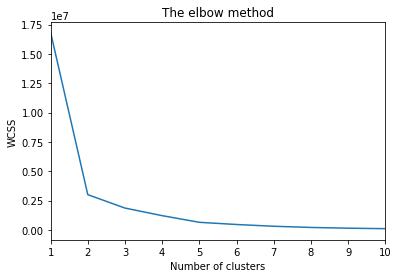

Optimum Clusters identified at: 2
Waste Cell
form Cell
thermal Cell
Waste Cell
form Cell
fracture Cell
Waste Cell
form Cell
thermal Cell
Waste Cell
form Cell
density Cell
Symbol Cell
k Cell
Thermal Cell
o. Cell
coefficient Cell
a Cell
5680_035.csv
1294 1311
a a
1311 1354
a 1948
1354 1395
1948 1949
1395 1437
1949 1951
1437 1478
1951 1992
1478 1520
1992 1953
1520 1561
1953 1953
1561 1602
1953 1953
1602 1644
1953 1954
1644 1685
1954 1954
1685 1727
1954 1954
1727 1769
1954 1954
1769 1811
1954 1955
1811 1853
1955 1955
1853 1893
1955 1955
1893 1935
1955 1955
1935 1976
1955 1956
1976 2018
1956 1956
2018 2060
1956 1956
2060 2101
1956 1957
2101 2142
1957 1959
2142 2184
1959 1960
2184 2226
1960 1961
2226 2267
1961 1961
2267 2309
1961 1962
2309 2350
1962 1962
2350 2392
1962 1962
2392 2433
1962 1963
2433 2474
1963 1964
2474 2516
1964 1964
2516 2557
1964 1965
2557 2598
1965 1965
2598 2640
1965 1965
2640 2682
1965 1966
2682 2723
1966 1967
2723 2764
1967 1967
2764 2806
1967 1968
2806 2847
1968 1968
2

2871 2872
~ e
2872 2872
e -
2872 2872
- .
2872 2846
. 18
2117_344.csv
832 832
Time After
832 827
After Reprocessing”
985 891
  lyr
947 955
Constituent g
955 948
g MBq
1005 1006
Activation product
1006 1046
product Cc
1046 1061
Cc -
1061 1046
- 4.x
1046 1087
4.x Si
1087 1087
Si 4.6
1087 1090
4.6 Xx
1090 1076
Xx 10°
1076 1102
10° -
1102 1129
- Cr
1129 1129
Cr 1.5
1129 1131
1.5 x
1131 1118
x 10°
1118 1143
10° ~
1143 1170
~ Mn
1170 1170
Mn 16x
1170 1159
16x 10°
1159 1170
10° 84x
1170 1212
84x Fe
1212 1201
Fe 56X10°
1201 1211
56X10° 3.2x
1211 1253
3.2x Co
1253 1268
Co _
1268 1253
_ 1.4
1253 1256
1.4 xX
1256 1295
xX Ni
1295 1294
Ni 12x
1294 1283
12x 107
1283 1294
107 89x
1294 1336
89x Nb
1336 1351
Nb -
1351 1337
- 1.0
1337 1339
1.0 x
1339 1378
x Mo
1378 1377
Mo 2.0x
1377 1367
2.0x 10"
1367 1378
10" 78x
1378 1419
78x Tc
1419 1434
Tc -
1434 1419
- 3.1
1419 1422
3.1 X
1422 1460
X Total
1460 1460
Total activation
1460 1493
activation products?
1493 1501
products? 8.7
1501 1504
8.7 X
1504 1491
X 

2381 2388
plan assets
2388 2384
assets (279
2384 2383
(279 (123
2383 2384
(123 (236
2384 2428
(236 Net
2428 2428
Net amortization
2428 2427
amortization and
2427 2427
and deferrals
2427 2430
deferrals 165
2430 2429
165 16
2429 2422
16 |
2422 2430
| 143
2430 2474
143 Pension
2474 2482
Pension expense
2482 2473
expense due
2473 2481
due to
2481 2473
to sales
2473 2473
sales closures
2473 2473
closures and
2473 2474
and SFAS
2474 2474
SFAS No.
2474 2474
No. 88
2474 2476
88 (1
2476 2489
(1 —_
2489 2489
—_ —
2489 2546
— S
2546 2548
S 15
2548 2546
15 $
2546 2548
$ 13
2548 2545
13 $
2545 2548
$ 13
2548 2427
13  
2588 2595
   
1164_010.csv
2606 2506
e ~
2506 2366
~ =
2801 313
NI AIRT
2706 309
SKY °K)
1902 1897
(cm s~!)
2354 2348
(em s~1)
2504 2603
(dimensionless) (cm)
2603 2703
(cm) (dimensionless)
2703 2804
(dimensionless) (degrees)
2804 316
(degrees) temperature
316 313
temperature of
313 313
of the
313 314
the air
314 318
air at
318 323
at a
323 313
a standard
363 363
distance above
363 363

1311 1312
by repository
1312 1312
repository construction
1312 1314
construction operation
1314 1354
operation and
1354 1354
and closure
1354 1355
closure and
1355 1355
and by
1355 1356
by expected
1356 1356
expected interactions
1356 1364
interactions among
1364 1357
among the
1357 1400
the waste
1400 1397
waste host
1397 1397
host rock
1397 1398
rock ground
1398 1401
ground water
1401 1399
water and
1399 1399
and engineered
1399 1444
engineered components.
1444 1440
components. The
1440 1440
The characteristics
1440 1440
characteristics of
1440 1441
of and
1441 1442
and the
1442 1489
the processes
1489 1483
processes operating
1483 1482
operating within
1482 1482
within the
1482 1482
the geologic
1482 1484
geologic setting
1484 1524
setting shall
1524 1526
shall permit
1526 1526
permit compliance
1526 1525
compliance with
1525 1523
with (1)
1523 1526
(1) the
1526 1527
the requirements
1527 1567
requirements specified
1567 1569
specified in
1569 1569
in Section
1569 1566
Section 960.4

991 992
Reconfirms the
992 992
the Federal
992 992
Federal regulatory
992 994
regulatory requirements
994 1033
requirements including
1033 1033
including the
1033 1035
the requirement
1035 1034
requirement that
1034 1044
that any
1044 1044
any or
1044 1034
or ali
1034 1034
ali of
1034 1074
of the
1074 1074
the emplaced
1074 1079
emplaced waste
1079 1078
waste must
1078 1075
must be
1075 1075
be retrievable
1075 1076
retrievable in
1076 1115
in about
1115 1115
about the
1115 1126
the same
1126 1116
same length
1116 1116
length of
1116 1117
of time
1117 1126
time as
1126 1116
as that
1116 1117
that devoted
1117 1160
devoted to
1160 1158
to construction
1158 1157
construction and
1157 1157
and emplacement
1157 1158
emplacement starting
1158 1162
starting at
1162 1208
at any
1208 1199
any time
1199 1209
time up
1209 1202
up to
1202 1200
to 50
1200 1209
50 yr
1209 1198
yr after
1198 1198
after emplacement
1198 1240
emplacement operations
1240 1250
operations are
1250 1240
are initiated.
124

1442 1445
we .
1445 1425
. Orig.
1425 1427
Orig. 46
1427 1427
46 2
1427 1427
2 5
1427 1428
5 41
1428 1429
41 Brant
1429 1429
Brant and
1429 1431
and DeLong
1431 1431
DeLong (1960).6
1431 1455
(1960).6 Oklahoma
1455 1464
Oklahoma ..
1464 1459
.. R-1974
1459 1460
R-1974 7AN7
1460 1460
7AN7 0
1460 1461
0 0
1461 1461
0 7
1461 1461
7 Friedman
1461 1463
Friedman (1975).¢
1463 1488
(1975).¢ OPOGON
1488 1496
OPOGON occ
1496 1509
occ teteeteeeeceaserenseceaes
1509 1491
teteeteeeeceaserenseceaes Orig.
1491 1493
Orig. 50
1493 1512
50 sees
1512 1512
sees fees
1512 1494
fees 50
1494 1495
50 R.S.
1495 1496
R.S. Mason
1496 1495
Mason (written
1495 1504
(written commun.
1504 1497
commun. 1965).6
1497 1521
1965).6 Pennsylvania...
1521 1524
Pennsylvania... R-1970
1524 1525
R-1970 964
1525 1525
964 4306
1525 1526
4306 612
1526 1526
612 63
1526 1527
63 Edmunds
1527 1529
Edmunds (1972).6
1529 1554
(1972).6 Tennessee
1554 1563
Tennessee ......
1563 1558
...... R-1959
1558 1558
R-1959 2
1558 1559
2 4109
1559

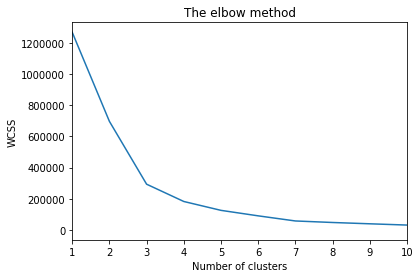

Optimum Clusters identified at: 4
WTS Cell
cs Cell
1 Cell
Laundry Cell
5593_060.csv
282 282
A =
282 280
= eT
280 278
eT  
554 368
  Wellhead
408 408
thermal Beneficial
448 452
Comments energy
452 447
energy heat
477 488
(1018 3)
488 478
3) (1018
478 488
(1018 3)
615 600
A D
600 609
D A
687 685
several springs
685 687
springs to
687 681
to 84°C.
681 684
84°C. 0.22
684 684
0.22 0.054
853 844
jo artesian
844 844
artesian wells
844 843
wells 244
843 843
244 and
843 843
and 305
843 848
305 m
848 842
m deep
842 841
deep discharging
841 841
discharging 500
841 840
500 L/min
840 843
L/min at
843 839
at 80°C;
839 843
80°C; 0.28
843 843
0.28 0.067
843 885
0.067 naximum
885 884
naximum well
884 884
well temperature
884 879
temperature 108°C;
879 881
108°C; extensive
881 880
extensive travertine.
1003 1002
several springs
1002 1001
springs and
1001 1001
and three
1001 1000
three wells
1000 1000
wells deepest
1000 999
deepest 1795
999 1005
1795 m
1005 998
m maximum
998 1000
maximum temperature
1000

2774 2775
$1 1
2775 2776
1 1
2776 2776
1 1
2776 2777
1 1
2777 2818
1 Plastic
2818 2818
Plastic resins
2818 2821
resins 655
2821 2821
655 583
2821 2822
583 538
2822 2822
538 $22
2822 2823
$22 ~~
2823 2823
~~ 1
2823 2864
1 Synthetic
2864 2864
Synthetic fibers
2864 2866
fibers 159
2866 2867
159 185
2867 2867
185 169
2867 2868
169 187
2868 2868
187 171
2868 2910
171 Plastic
2910 2910
Plastic pipe
2910 2912
pipe 133
2912 2913
133 114
2913 2913
114 117
2913 2914
117 115
2914 2914
115 128
2914 2955
128 Other
2955 2956
Other sales
2956 2956
sales and
2956 2956
and services
2956 2958
services 103
2958 2958
103 87
2958 2959
87 51
2959 2959
51 46
2959 2960
46 39
2960 3004
39 $2
3004 3004
$2 2
3004 3005
2 1
3005 3005
1 2
3005 3006
2 2
3006 3035
2  
3035 3046
   
Millions 0 of
of 1 Dollars
Dollars 2  
  3  
  4  
  5  
  6  
  7  
  8 Operating
Operating 9 Revenues
Revenues 10 1993
1993 11 1992
1992 12 199]
199] 13 1990
1990 14 1989
1989 15 Chemicals
Chemicals 16 $1
$1 17 1
1 18 1
1 19 1
1 20 1
1 2

2396 2394
($ 1423)
2394 2397
1423) $
2397 2393
$ 1046
2393 2444
1046 Earnings
2444 2444
Earnings (Loss)
2444 2443
(Loss) Attributable
2443 2448
Attributable to
2448 2443
to Class
2443 2446
Class H
2446 2484
H Common
2484 2483
Common Stock
2483 2491
Stock on
2491 2491
on a
2491 2485
a Per
2485 2482
Per Share
2482 2483
Share Basis
2483 2522
Basis Before
2522 2522
Before cumulative
2522 2522
cumulative effect
2522 2522
effect of
2522 2524
of accounting
2524 2522
accounting changes
2522 2523
changes $2.30
2523 2525
$2.30 ($0.11)
2525 2522
($0.11) $1.26
2522 2562
$1.26 Cumulative
2562 2561
Cumulative effect
2561 2561
effect of
2561 2564
of accounting
2564 2562
accounting changes
2562 2580
changes =
2580 2564
= (
2564 2564
( 2.18)e
2564 2565
2.18)e 0.13.
2565 2613
0.13. Net
2613 2613
Net earnings
2613 2611
earnings (loss)
2611 2611
(loss) attributable
2611 2616
attributable to
2616 2611
to Class
2611 2613
Class H
2613 2620
H common
2620 2612
common stock
2612 2612
stock $2.30
2612 2613
$2.30

547 547
Operation Description
711 678
ad ot
678 613
ot Certify
613 614
Certify Closure;
678 679
Monitor hote
679 613
hote 3
678 711
3.1 .3.2
711 712
.3.2 Certify
712 712
Certify closure
712 444
closure  
519 520
Time (min}
520 522
(min} Crew
575 551
  ind.
551 554
ind. Cum
554 553
Cum Number
553 554
Number Member
683 685
20 VETRM
685 716
VETRM 20
716 718
20 VE
718 719
VE VOC
719 748
VOC 4a
748 749
4a 200
749 450
200  
480 495
  Crew
495 496
Crew Member
496 497
Member Dose
497 460
Dose Exposure
522 524
Time Area
524 525
Area Dose
525 526
Dose Rate
555 556
(min) Number
556 558
Number (mrem/min)
558 559
(mrem/min) _ind
686 686
20.0 4.0
686 687
4.0 (BG)
687 689
(BG) 0.001
689 691
0.001 0.02
691 719
0.02 en.o
719 719
en.o 4.0
719 723
4.0 0
723 724
0 0.02
724 533
0.02 mrem
692 725
0.02 0.92
725 563
0.92 Cum
693 693
Io io
693 693
io IND
728 727
Cc o
727 726
o i
6294_128.csv
2471 2468
Average (ppm)
2468 2540
(ppm) Analysis
2540 2545
Analysis RFP
2545 2547
RFP LASL
2691 2696
Al 9
2696 2697
9 27

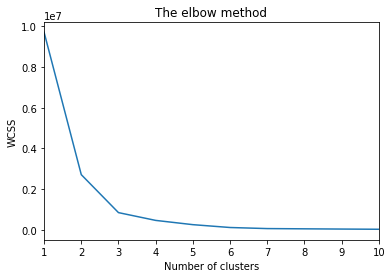

Optimum Clusters identified at: 5
Average Cell
9 Cell
130 Cell
6 Cell
12 Cell
(ppm) Cell
27 Cell
165 Cell
55 Cell
11 Cell
16 Cell
16 Cell
Ca Cell
Fe Cell
K Cell
Na Cell
2135_012.csv
697 581
  Time
581 588
Time ¢
588 582
¢ since
582 583
since pumping
583 582
pumping Drawdown
582 588
Drawdown s
588 581
s (meters)
623 622
Started minutes)
622 621
minutes) Ow-!
621 621
Ow-! Ow-2
621 622
Ow-2 OwWw.3
750 749
0.5 0.335
749 749
0.335 0.153
749 750
0.153 0.492
792 789
I 0.591
789 789
0.591 0.343
789 790
0.343 0.762
831 829
2 0.911
829 829
0.911 0.61!
829 831
0.61! 1.089
831 871
1.089 3
871 869
3 1.082
869 869
1.082 0.762
869 871
0.762 1.284
871 912
1.284 4
912 910
4 1.215
910 909
1.215 0.911
909 911
0.911 1.419
911 951
1.419 6
951 949
6 1.405
949 949
1.405 1.089
949 950
1.089 1.609
950 990
1.609 8
990 989
8 1.549
989 988
1.549 1
988 990
1 1.757
990 1030
1.757 10
1030 1029
10 1.653
1029 1028
1.653 1.329
1028 1029
1.329 1.853
1029 1070
1.853 15
1070 1069
15 1.853
1069 1068
1.853 1.531
1068 1068
1

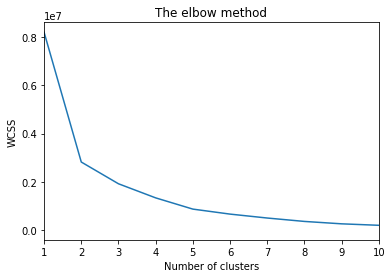

Optimum Clusters identified at: 2
FTP Cell
- Cell
Fluid Cell
coefficients Cell
AW Cell
- Cell
Aquifer Cell
SW Cell
- Cell
Surface Cell
Properties Cell
(relative Cell
to Cell
distributions Cell
influenced Cell
by Cell
(hydrologic Cell
factors Cell
in Cell
aquifer Cell
(hydrologic Cell
factors Cell
in Cell
surface Cell
9529_050.csv
2302 2310
Benefits earned
2310 2302
earned py
2302 2301
py eniployees
2301 2356
eniployees Interest
2356 2365
Interest on
2365 2354
on accumulated
2354 2354
accumulated benefit
2354 2354
benefit obligations
2354 2427
obligations Net
2427 2428
Net postretivement
2428 2425
postretivement benefit
2425 2431
benefit expense
2431 2235
expense 1994
2235 2299
1994 >
2299 2302
> 4
2302 2352
4 if
2352 2422
if >
2422 2422
> 75
Benefits 0 earned
earned 1 py
py 2 eniployees
eniployees 3 Interest
Interest 4 on
on 5 accumulated
accumulated 6 benefit
benefit 7 obligations
obligations 8 Net
Net 9 postretivement
postretivement 10 benefit
benefit 11 expense
expense 12 1994
1994 

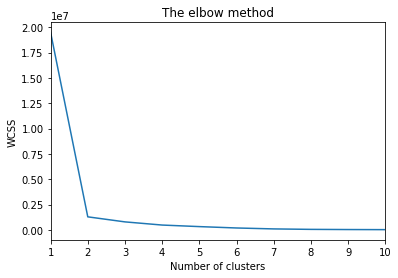

Optimum Clusters identified at: 2
Benefits Cell
earned Cell
py Cell
eniployees Cell
Interest Cell
on Cell
accumulated Cell
benefit Cell
obligations Cell
Net Cell
postretivement Cell
benefit Cell
1994 Cell
> Cell
4 Cell
if Cell
1674_088.csv
774 775
(OET. LIM.)
850 849
Al (.03)
849 889
(.03) As
889 887
As (.08)
887 925
(.08) B
925 925
B (.OL)
925 963
(.OL) Ba
963 963
Ba (.002)
963 1001
(.002) Ca
1001 1000
Ca (.01)
1000 1038
(.01) Cd
1038 1038
Cd (.004)
1038 1075
(.004) Ce
1075 1074
Ce (.04)
1074 1113
(.04) Co
1113 1112
Co (.01)
1112 1151
(.01) Cr
1151 1150
Cr (.02)
1150 1188
(.02) Cu
1188 1187
Cu (.004)
1187 1226
(.004) Dy
1226 1225
Dy (.004)
1225 1263
(.004) fu
1263 1263
fu (.002)
1263 1300
(.002) Fa
1300 1300
Fa (.005)
1300 1338
(.005) Gd
1338 1337
Gd (.01)
1337 1377
(.01) K
1377 1375
K (.3)
1375 1415
(.3) La
1415 1412
La (.008)
1412 1451
(.008) Li
1451 1450
Li (.004)
1450 1489
(.004) 4g
1489 1487
4g (.06)
1487 1526
(.06) Mn
1526 1524
Mn (.002)
1524 1564
(.002) Mg
1564 1563
Mg (.01)
15

1236 1239
amenable to
1239 1294
to mitigation
1399 1397
3 Two
1397 1392
Two historical
1392 1391
historical properties
1391 1389
properties of
1389 1388
of major
1388 1386
major significance
1386 1394
significance or
1394 1388
or ten
1388 1442
ten historical
1442 1440
historical properties
1440 1439
properties of
1439 1439
of minor
1439 1436
minor significance
1436 1444
significance are
1444 1433
are subjected
1433 1498
subjected to
1498 1495
to adverse
1495 1492
adverse impacts
1492 1491
impacts that
1491 1498
that are
1498 1488
are major
1488 1488
major and
1488 1489
and cannot
1489 1485
cannot be
1485 1542
be adequately
1542 1541
adequately mitigated
1646 1644
4 Three
1644 1640
Three historical
1640 1637
historical properties
1637 1636
properties of
1636 1636
of major
1636 1633
major significance
1633 1641
significance or
1641 1631
or 15
1631 1690
15 historical
1690 1688
historical properties
1688 1697
properties or
1697 1687
or minor
1687 1684
minor significance
1684 1692
significa

1180 1181
* TIME
1181 1181
TIME REQUIRED
1181 1181
REQUIRED TO
1181 1181
TO PERFORM
1181 1181
PERFORM THE
1181 1181
THE RETRIEVAL
1181 1178
RETRIEVAL *
1178 1178
* APPROXIMATELY
1178 1176
APPROXIMATELY 84
1176 1178
84 YEARS
1178 1178
YEARS MED
1178 1231
MED PROCESS
STEP 0 4
4 1 STEP
STEP 2 5
5 3 PERFORMANCE
PERFORMANCE 4 MEASURES
MEASURES 5 PERFORMANCE
PERFORMANCE 6 GOALS
GOALS 7 AND
AND 8 CONFIDENCE
CONFIDENCE 9  
  10 GOAL
GOAL 11 CONF
CONF 12 IDENCE
IDENCE 13 FUNCTION:
FUNCTION: 14 ESTABLISH
ESTABLISH 15 REASONABLE
REASONABLE 16 SCHEDULE
SCHEDULE 17 FOR
FOR 18 WASTE
WASTE 19 RETRIEVAL
RETRIEVAL 20 *
* 21 TIME
TIME 22 REQUIRED
REQUIRED 23 TO
TO 24 PERFORM
PERFORM 25 THE
THE 26 RETRIEVAL
RETRIEVAL 27 *
* 28 APPROXIMATELY
APPROXIMATELY 29 84
84 30 YEARS
YEARS 31 MED
MED 32 PROCESS


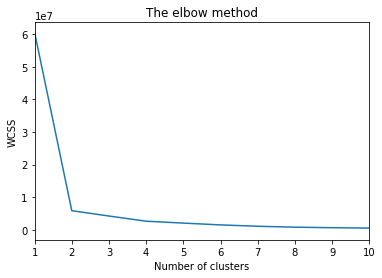

Optimum Clusters identified at: 2
STEP Cell
PERFORMANCE Cell
FUNCTION: Cell
ESTABLISH Cell
REASONABLE Cell
SCHEDULE Cell
FOR Cell
WASTE Cell
* Cell
TIME Cell
REQUIRED Cell
TO Cell
PERFORM Cell
THE Cell
RETRIEVAL Cell
STEP Cell
PERFORMANCE Cell
GOALS Cell
AND Cell
CONFIDENCE Cell
GOAL Cell
CONF Cell
* Cell
APPROXIMATELY Cell
84 Cell
YEARS Cell
MED Cell
5375_004.csv
757 755
STATION LATITUDE
755 735
LATITUDE LONGITUDE
735 731
LONGITUDE ELEVATION
853 853
Nelson Nev.
853 844
Nev. 35°42!
844 845
35°42! kb
845 846
kb 6"
846 841
6" 114°50'
841 843
114°50' 36.5"
843 844
36.5" 3280!
947 948
Tonopah Nev.
948 939
Nev. 38°04!
939 941
38°04! 29.6"
941 937
29.6" 117°13'
937 938
117°13' 20.8"
938 939
20.8" 6180!
1042 1041
Leeds Utah
1041 1034
Utah 37°14"
1034 1037
37°14" 35.4"
1037 1032
35.4" 113°22'
1032 1037
113°22' 35.9"
1037 1038
35.9" 3512!
1138 1129
Darwin Calif.
1129 1129
Calif. 36°16!
1129 1131
36°16! 36.7"
1131 1127
36.7" 117°
1127 1134
117° 35'
1134 1131
35' 37.0"
1131 1135
37.0" 5950!
1232 

1524 1524
dollars) (2.96)
1524 1524
(2.96) (4.92)
1524 1524
(4.92) (10.00)
1524 1525
(10.00) 6.00
1525 1524
6.00 10.17
1524 1571
10.17 Net
1571 1571
Net income
1571 1570
income (loss)
1570 1569
(loss) applicable
1569 1573
applicable to
1573 1569
to Steel
1569 1569
Steel Stock
1569 1568
Stock (259)
1568 1568
(259) (1
1568 1569
(1 (509)
1569 1569
(509) 306
1569 1568
306 523
1568 1616
523 Net
1616 1616
Net income
1616 1614
income (loss)
1614 1623
(loss) per
1623 1614
per share
1614 1630
share —
1630 1614
— primary
1614 1614
primary (in
1614 1613
(in dollars)
1613 1612
dollars) (4.04)
1612 1613
(4.04) (28.85)
1613 1613
(28.85) (10.00)
1613 1614
(10.00) 6.00
1614 1613
6.00 10.17
1613 1659
10.17 Dividends
1659 1659
Dividends paid
1659 1668
paid per
1668 1659
per share
1659 1659
share (in
1659 1650
(in dollars)
1650 1659
dollars) 1.00
1659 1659
1.00 1.00
1659 1659
1.00 94
1659 1658
94 88
1658 1658
88 88
1658 1713
88 Delhi
1713 1713
Delhi Stock
1713 1712
Stock Outstanding
1712 1712
Outstanding

1756 1814
875.5 TLL
1814 1872
TLL (838.5
1872 1928
(838.5 $10
2103 2106
S 4207
2106 2164
4207 133.9.
2164 2223
133.9. 156.4
2223 2281
156.4 86.3
2281 2340
86.3 5.9]
2340 2398
5.9] (1)
2398 2454
(1) §
2454 2456
§ 7833
2629 2631
§ 49713
2631 2690
49713 1
2690 2748
1 820.5
2748 2807
820.5 409.9
2807 2865
409.9 592.6
2865 2923
592.6 (4.3)
2923 2981
(4.3) 8
2981 3039
8 123.1
3039 3096
123.1 §
3096 3098
§ 8510.5
(In 0 millions)
millions) 1 Sales
Sales 2 to
to 3 Unaffiliated
Unaffiliated 4 Customers
Customers 5 United
United 6 States
States 7 Europe
Latin 9 America
America 10 Asia
Net 13 Sales
Sales 14 Inter-Geographic
Inter-Geographic 15 Sales
Sales 16 United
United 17 States
States 18 Europe
Europe 19 Latin
Latin 20 America
America 21 Asia
Asia 22 Canada
Canada 23 Total
Total 24 Revenue
Revenue 25 United
United 26 States
States 27 Europe
Europe 28 Latin
Latin 29 America
America 30 Asia
Asia 31 Canada
Canada 32 Adjustments
Adjustments 33 and
and 34 eliminations
eliminations 35 Total
6583_055

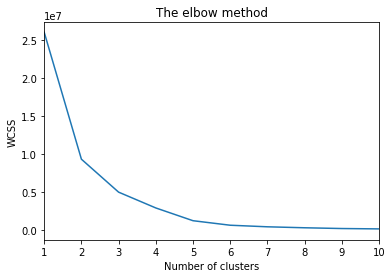

Optimum Clusters identified at: 6
  Cell
Destination Cell
(repository Cell
Salt Cell
Cask Cell
size Cell
100 Cell
100 Cell
150 Cell
100 Cell
All Cell
spent Cell
8 Cell
8 Cell
3 Cell
6 Cell
Eastern Cell
5625_015.csv
320 320
Reservoir Assumptions
404 404
Sub-—s- Thick-
404 406
Thick- Vol-
455 455
Sur- ness
455 457
ness ume
613 617
km? 4/
617 617
4/ km
617 617
km 5/
617 613
5/ km3
613 618
km3 6/
743 744
65 2
744 744
2 130
1081 1081
1.5 1.5
1081 1082
1.5 2.25
1460 1462
6 2
1462 1462
2 12
1630 1630
3 1.5
1630 1631
1.5 4.5
1928 1927
6 2
1927 1927
2 12
2095 2096
50 2
2096 2096
2 100
2222 2222
2 2
2222 2223
2 4
2223 2306
4 8
2306 2307
8 2
2307 2307
2 16
2461 2475
4 2
2475 2476
2 8
2643 2644
1.5 1.5
2644 2645
1.5 2.25
2645 408
2.25 Heat
1463 459
1.4 Comments
745 746
Pleistocene caldera
746 746
caldera with
746 746
with 1
746 754
1 group
754 747
group acid-sulfate
788 785
springs (Sulphur
785 785
(Sulphur Springs)
785 789
Springs) and
789 797
and very
797 790
very extensive
830 831
hydrothermal 

1309 1308
715.9 614.7
1308 1314
614.7 518.0(3)
1314 1314
518.0(3) 443.7
1314 1319
443.7 391.5
1319 1318
391.5 348.0
1514 1514
$ 842.4
1514 1516
842.4 $
1516 1516
$ 767.2
1516 1518
767.2 $
1518 1521
$ 715.9
1521 1521
715.9 $
1521 1521
$ 614.7
1521 1524
614.7 $
1524 1526
$ 518.03)
1526 1526
518.03)  $
1526 1526
 $ 443.7
1526 1529
443.7 $
1529 1531
$ 391.5
1531 1530
391.5 $
1530 1530
$ 348.0
1651 1652
$ 2.96
1652 1654
2.96 $
1654 1654
$ 2.68
1654 1656
2.68 $
1656 1656
$ 245
1656 1659
245 $
1659 1659
$ 2.04
1659 1661
2.04 $
1661 1661
$ 1693)
1661 1663
1693) $
1663 1664
$ 142
1664 1666
142 §
1666 1669
§ 1.23
1669 1668
1.23 $
1668 1671
$ 1.08
1764 1764
$ 2.96
1764 1767
2.96 $
1767 1767
$ 2.68
1767 1770
2.68 $
1770 1769
$ 2.45
1769 1772
2.45 $
1772 1772
$ 2.04
1772 1774
2.04 $
1774 1774
$ 1693)
1774 1777
1693) $
1777 1776
$ 142
1776 1779
142 $
1779 1782
$ 123
1782 1780
123 $
1780 1784
$ 1.08
1935 1938
$ 2.95
1938 1937
2.95 $2.68
1937 1939
$2.68 $
1939 1940
$ 245
1940 1942
245 $
1942 1943
$ 2.

358 358
PHASE TIM
389 388
1961 cute
497 483
e 16
483 482
16 436
482 482
436 EPUl
482 481
EPUl 2
481 482
2 33
528 514
. 30
514 513
30 2
513 513
2 33
558 545
oe 16
545 544
16 Lop
544 543
Lop €EPDO
543 543
€EPDO 2
543 543
2 33
589 574
° $2
574 574
$2 2
574 574
2 33
621 607
e 16
607 606
16 SDH
606 606
SDH EP
606 606
EP 0
606 605
0 233
651 636
. $3
636 636
$3 2
636 636
2 33
681 668
o 16
668 667
16 NOP
667 668
NOP EP
668 669
EP 4
669 666
4 2
666 666
2 33
712 698
. $0
698 697
$0 2
697 698
2 33
743 729
o 16
729 728
16 SSP
728 729
SSP EP
729 728
EP 4
728 728
4 2
728 728
2 33
774 760
. $4
760 759
$4 2
759 759
2 33
804 792
« 16
792 791
16 YMT3
791 791
YMT3 EPDO
791 790
EPDO 2
790 790
2 33
836 822
. $0
822 820
$0 2
820 821
2 33
867 854
e 16
854 853
16 YMTt
853 852
YMTt EP
852 854
EP 4
854 852
4 2
852 853
2 33
898 884
. 34
884 884
34 2
884 884
2 34
929 929
e POCCSSS
929 930
POCCSSS SOS
930 929
SOS SE
929 929
SE HH
929 929
HH EHH
929 929
EHH HEE
929 928
HEE SHEET
928 929
SHEET EHEC
929 929
EHEC SSE


1483 1483
SEH SCSHETHEHHFC
1483 1483
SCSHETHEHHFC EHH
1483 1484
EHH SFHESE
1484 1484
SFHESE SHH
1484 1483
SHH SHEHH
1483 1484
SHEHH EHO
1484 1483
EHO SEH
1483 1483
SEH ET
1483 1482
ET EES
1482 1548
EES eee
1548 1549
eee c
1549 1548
c cece
1548 1548
cece cc
1548 1548
cc cece
1548 1548
cece reece
1548 1548
reece ee
1548 1548
ee eee
1548 1547
eee eee
1547 1547
eee terete
1547 1547
terete eee
1547 1546
eee ORR
1546 1547
ORR E
1547 1547
E RECO
1547 1546
RECO EERE
1546 1546
EERE ROH
1546 1546
ROH eee
1546 1546
eee O
1546 1545
O OOOOH
1545 1546
OOOOH OEE
1546 1546
OEE D
1546 1546
D OO
1546 1545
OO EERE
1545 1545
EERE eEeneeeees
1545 1565
eEeneeeees RMS
1565 1569
RMS =
1569 1565
= 0.17
1565 1565
0.17 NO
1565 1569
NO =
1569 1564
= 25
1564 1595
25 ERX
1595 1600
ERX =
1600 1595
= 0.2
1595 1595
0.2 ERH
1595 1599
ERH =
1599 1595
= 0.4
1595 1594
0.4 AVFM
1594 1598
AVFM =
1598 1594
= 1.9
1594 1595
1.9 @28
1595 1627
@28 ERY
1627 1631
ERY =
1631 1626
= 0.3
1626 1626
0.3 GAP
1626 1630
GAP =
1630 1626
= 

836 840
Disneyland #
840 835
# 11
835 835
11 $28.75
835 835
$28.75 $23
835 835
$23 $23
835 872
$23 Anaheim
872 872
Anaheim California;
872 872
California; (714)
872 872
(714) 999-4565
872 915
999-4565 Universal
915 923
Universal Studios
923 923
Studios Florida
923 923
Florida *#
923 922
*# 6
922 922
6 $34
922 922
$34 $27
922 922
$27 NIA
922 955
NIA Orlando;
955 958
Orlando; Florida;
958 958
Florida; (407)
958 958
(407) 363-8000
1011 1011
Universal Studios
1011 1011
Studios Hollywood
1011 1015
Hollywood #
1015 1010
# 4
1010 1010
4 $27
1010 1010
$27 $21
1010 1011
$21 $21
1011 1047
$21 Universal
1047 1047
Universal City
1047 1047
City California;
1047 1047
California; (818)
1047 1047
(818) 508-9600
1047 1097
508-9600 Sea
1097 1097
Sea World
1097 1097
World of
1097 1097
of Florida
1097 1102
Florida #
1102 1097
# 4
1097 1097
4 $31.95
1097 1098
$31.95 $27.95
1098 1097
$27.95 $27.15
1097 1132
$27.15 Orlando
1132 1133
Orlando Florida;
1133 1133
Florida; (407)
1133 1133
(407) 351-3600
1133 1186

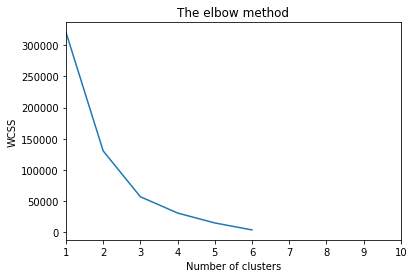

Optimum Clusters identified at: 2
16 Cell
1994 Cell
so Cell
5856_026.csv
616 612
Species :
612 591
: Density
591 592
Density Frequency
592 590
Frequency Coverage
590 589
Coverage Averape
589 557
Averape |
647 639
' °
639 645
° per
645 637
per 100
637 628
100 m2
628 632
m2 (%)
632 630
(%) (%)
630 632
(%) Height
632 630
Height (19)
814 810
Ceveegune ramoslesima
878 877
ESvhedra novadensts
946 945
LUGLUN Gidiergontt
1014 1013
Grayta spinosa
1081 1078
Atriplex confertifolia
1238 1237
ot at
1237 1242
at Stipa
1242 1247
Stipa SPesios.
1247 1270
SPesios. i
1270 1305
i Helurta
1305 1304
Helurta gumesti
1400 1463
FORBS 4
1463 1462
4 Tae
1462 1461
Tae t4
1461 1465
t4 SDAAEYALCER
1465 1470
SDAAEYALCER GILIGua
1556 1554
OTHER PERENNIALS
1554 1552
PERENNIALS (15)*
Species 0 :
: 1 Density
Density 2 Frequency
Frequency 3 Coverage
Coverage 4 Averape
Averape 5 |
| 6 '
' 7 °
° 8 per
per 9 100
100 10 m2
m2 11 (%)
(%) 12 (%)
(%) 13 Height
Height 14 (19)
(19) 15 SHRUBS
Ceveegune 17 ramoslesima
ramoslesima 

2027 2027
2.57(0.23)  3.00(0.27)
2027 2027
 3.00(0.27) 0.93(0.24)
2027 2027
0.93(0.24)  3.15(0.09)
2027 2026
 3.15(0.09)  2.85(0.04)
2026 2077
 2.85(0.04) K
2077 2078
K 0.15
2078 2075
0.15 2.25(1.90)
2075 2076
2.25(1.90) 4.05(0.29)
2076 2075
4.05(0.29) 2.30(0.70)
2075 2075
2.30(0.70) 7.54(0.39)
2075 2075
7.54(0.39) 8.01(0.33)
2075 2124
8.01(0.33) Total
2124 2124
Total 94.29
2124 2124
94.29 90.36
2124 2125
90.36 99.43
2125 2124
99.43 99.89
2124 2124
99.89 74.73
2124 2124
74.73 77.95
2124 2219
77.95 Qz
2219 2220
Qz 46.17
2220 2267
46.17 or
2267 2268
or 24.86
2268 2315
24.86 Ab
2315 2316
Ab 28.00
2316 2364
28.00 An
2364 2365
An 0.97
2365 2411
0.97 Si/Al
2411 2413
Si/Al 3.21
2413 2412
3.21 3.39
2412 2460
3.39 Qz
2460 2459
Qz Qz+AF
2459 2460
Qz+AF Qz+AF
2460 2461
Qz+AF Qz
2461 2459
Qz Mord
2459 2459
Mord Mord
ANALYSES 0 a
a 1 b
b 2 c
c 3 d
d 4 e
e 5 f
f 6 Oxide
Oxide 7 (1)
(1) 8 (2)
(2) 9 (3)
(3) 10 (3)
(3) 11 (5)
(5) 12 (2)
(2) 13 Si0
Si0 14 93.05
93.05 15  76.84(5.87)
 76.84(5.87) 16  81.

500 500
MS REF
500 500
REF ML
500 500
ML REF
500 500
REF WD
500 437
WD INTENSITY
437 440
INTENSITY HYPOCENTER
506 506
FLAG RMS
506 506
RMS NO
506 506
NO LATITUDE
506 504
LATITUDE LONGITUDE
504 504
LONGITUDE ERH
504 503
ERH Q
503 503
Q GAP
503 503
GAP DEPTH
503 502
DEPTH ERZ
502 501
ERZ REF
501 443
REF ORIGIN
443 443
ORIGIN TIME
506 506
HR MN
506 506
MN SEC
506 443
SEC DATE
500 500
mb REF
500 500
REF OTH
500 499
OTH REF
499 500
REF REF
500 500
REF I
500 500
I REF
500 503
REF (UTC)
545 547
   
547 548
   
595 595
5 ltt
735 607
tl HTT
607 608
HTT LETT
608 596
LETT e
596 596
e sllttl
596 618
sllttl oo
683 715
6 oe
715 747
oe ee
747 612
ee HITT
612 601
HITT aiecee
601 620
aiecee 7
717 749
eo ee
749 621
ee oe
750 622
ee oo
686 719
* ewe
719 635
ewe 18
668 700
18 18
700 732
18 19
732 764
19 19
764 603
19 1972
603 603
1972 NOV
603 603
NOV 18
668 700
1972 1972
700 732
1972 1972
732 765
1972 1972
950 833
E Ld
929 844
Te] oo
908 941
© ©
941 973
© oO
973 838
oO HLTH
838 827
HLTH S83588
827 846
S83

ParserError: Error tokenizing data. C error: EOF inside string starting at row 117

In [64]:
flag=0
for csv_file in os.listdir(img_dir):
    if csv_file.endswith(".csv"):
        print(csv_file)
        df=pd.read_csv(csv_file,usecols=[0,1,2,3,4,5],header=0)
        image_create(csv_file,df)
        try:
            X2=row_id(df)
            y_kmeans=K_Means(X2)
            cells=TCD(y_kmeans)
            clustered_image(csv_file,cells)
        except (IndexError,KeyError):
            pass

In [ ]:
cells